# Experimento: Contador Aproximado (Sloppy Counter)

Este totebook contiene el análisis de los resultados experimentales obtenidos a partir de la implementación de un **contador aproximado (sloppy counter)**.

El propósito del experimento es comparar el **desempeño y la precisión** del contador bajo distintos niveles de concurrencia y diferentes valores de **umbral (`threshold`)**, parámetro que define la frecuencia con la que los contadores locales transfieren su valor al contador global.

Los datos experimentales fueron recolectados ejecutando los siguientes programas en una máquina local con soporte para múltiples núcleos:

- `benchmark_sloppy_counter.c`: mide el desempeño al variar el número de hilos.
- `benchmark_thresh_amt1.c`: analiza el impacto del parámetro `threshold` sobre el tiempo de ejecución.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')

# Cargar los datos
sloppy = pd.read_csv('results_sloppy.csv')
thresh = pd.read_csv('results_thresh_amt1.csv')

display(sloppy.head())
display(thresh.head())


,Threads,Time(s),Expected,Actual
0,1,0.0179,1000000,1000000
1,2,0.0752,2000000,2000000
2,4,0.2143,4000000,4000000
3,8,0.2732,8000000,8000000
4,16,0.5314,16000000,16000000


,Threshold,Time(s),Expected,Actual
0,1,7.8313,80000000,80000000
1,2,5.1900,80000000,80000000
2,4,3.8358,80000000,80000000
3,8,3.7872,80000000,80000000
4,16,3.6094,80000000,80000000


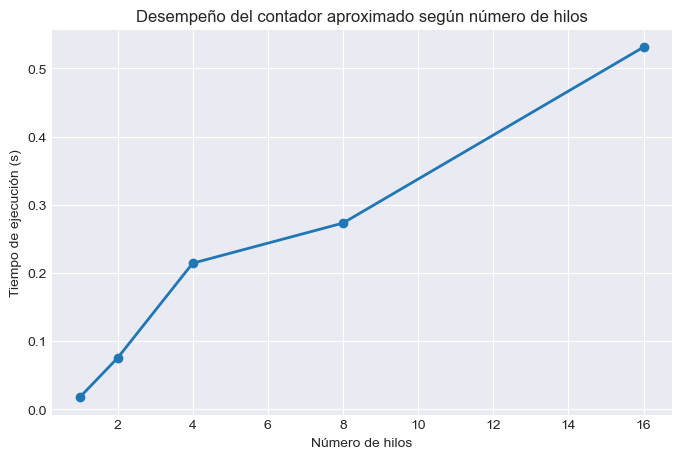

In [3]:
# ==========================================
# 1. Desempeño de acuerdo al número de hilos
# ==========================================

plt.figure(figsize=(8,5))
plt.plot(sloppy['Threads'], sloppy['Time(s)'], marker='o', linewidth=2)
plt.title('Desempeño del contador aproximado según número de hilos')
plt.xlabel('Número de hilos')
plt.ylabel('Tiempo de ejecución (s)')
plt.grid(True)
plt.show()


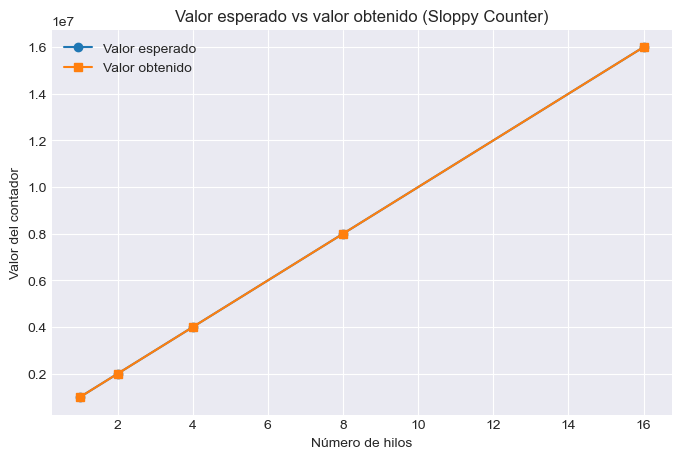

In [5]:
# ==========================================
# 2. Comparación del valor real vs esperado
# ==========================================

plt.figure(figsize=(8,5))
plt.plot(sloppy['Threads'], sloppy['Expected'], marker='o', label='Valor esperado')
plt.plot(sloppy['Threads'], sloppy['Actual'], marker='s', label='Valor obtenido')
plt.title('Valor esperado vs valor obtenido (Sloppy Counter)')
plt.xlabel('Número de hilos')
plt.ylabel('Valor del contador')
plt.legend()
plt.grid(True)
plt.show()


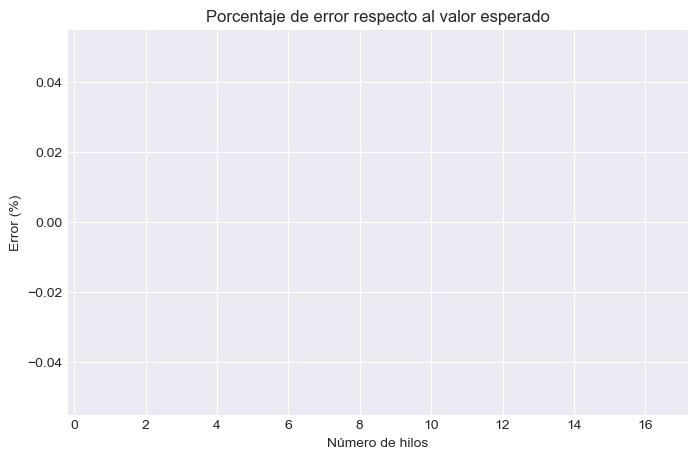

In [7]:
# ==========================================
# 3. Porcentaje de error en el contador
# ==========================================

sloppy['Error(%)'] = (1 - sloppy['Actual'] / sloppy['Expected']) * 100

plt.figure(figsize=(8,5))
plt.bar(sloppy['Threads'], sloppy['Error(%)'], color='tomato')
plt.title('Porcentaje de error respecto al valor esperado')
plt.xlabel('Número de hilos')
plt.ylabel('Error (%)')
plt.show()


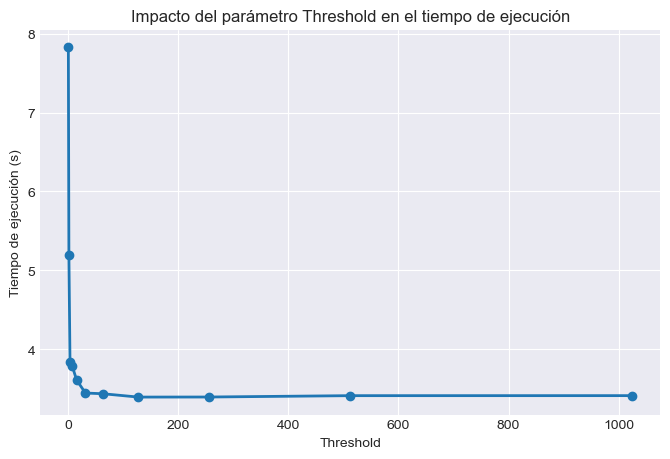

In [9]:
# ==========================================
# 4. Análisis del parámetro Threshold
# ==========================================

plt.figure(figsize=(8,5))
plt.plot(thresh['Threshold'], thresh['Time(s)'], marker='o', linewidth=2)
plt.title('Impacto del parámetro Threshold en el tiempo de ejecución')
plt.xlabel('Threshold')
plt.ylabel('Tiempo de ejecución (s)')
plt.grid(True)
plt.show()


## Conclusiones del análisis

- El **contador aproximado (sloppy counter)** distribuye las actualizaciones entre contadores locales, reduciendo la contención sobre el bloqueo global.  - El resultado muestra que el **tiempo de ejecución disminuye** con respecto a un contador totalmente sincronizado, especialmente con varios hilos.  
- Sin embargo, el **valor obtenido no es completamente exacto**, y el error tiende a aumentar a medida que se incrementa la concurrencia o se ajusta un `threshold` demasiado alto.  
- Existe un **compromiso entre rendimiento y precisión**: un `threshold` pequeño aumenta la exactitud pero también el costo de sincronización global.  
- Este comportamiento ilustra cómo las estrategias de sincronización fina (**fine-grained locking**) pueden mejorar el rendimiento en sistemas concurrentes cuando se tolera cierta pérdida de exactitud.
